In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('Insurance claims data.csv')
data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [7]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [8]:
data.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


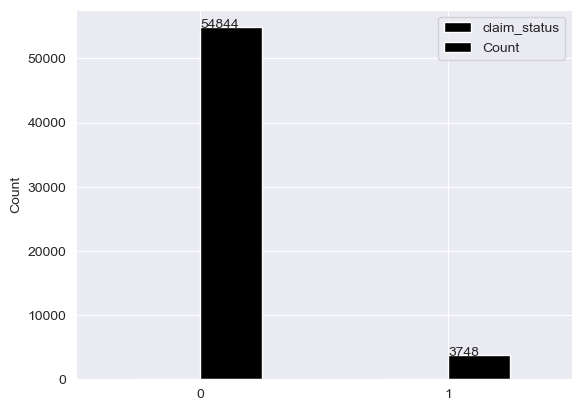

In [48]:

claim_destribution = data.groupby('claim_status')['claim_status'].value_counts().reset_index(name='Count')
ax = claim_destribution.plot(kind='bar', color='black')
for index, row in claim_destribution.iterrows():
    ax.text(index, row['Count'] + 0.2, str(row['Count']), ha='left')
plt.ylabel('Count')
plt.xticks(rotation=360,ha='center')
plt.show()

Here, data classes are highly imbalanced, this will cause our model to be biased towards high frequency class


#### Univariant Analysis

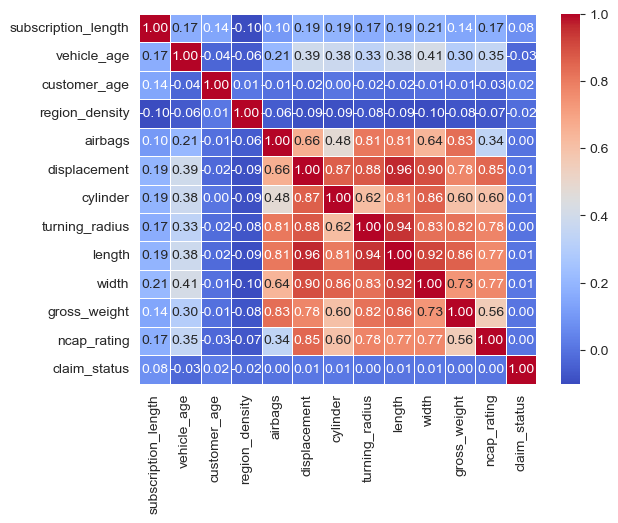

In [92]:
numerical_cols = data.select_dtypes(exclude='object').columns
correlation = data[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [120]:
correlated_features = set()
correlation_matrix = data[numerical_cols].corr()
threshold = 0.7

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [122]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[list(correlated_features)])

pca = PCA(n_components=2) 
data_pca = pca.fit_transform(data_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.8073547  0.08332712]


Hmm, we can capture about 80% variance in highly corelated 6 data wit just a single PCA component

In [123]:
cat_cols = data.select_dtypes(include='object').columns
cat_cols

Index(['policy_id', 'region_code', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

Key catagorical attributes 

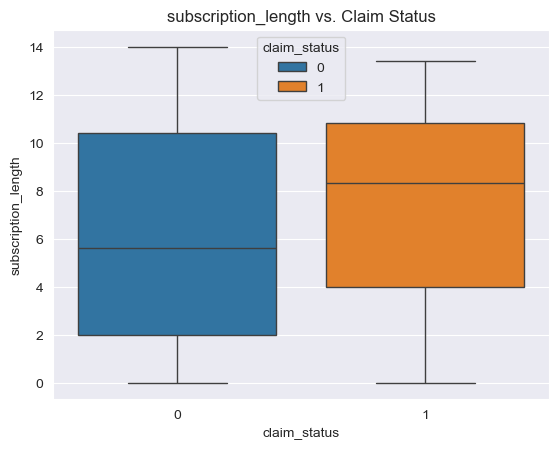

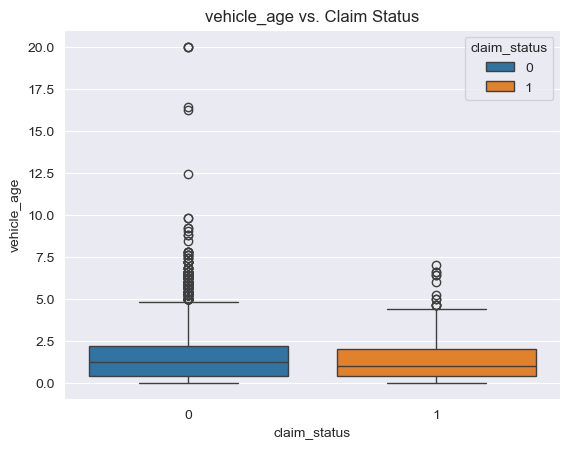

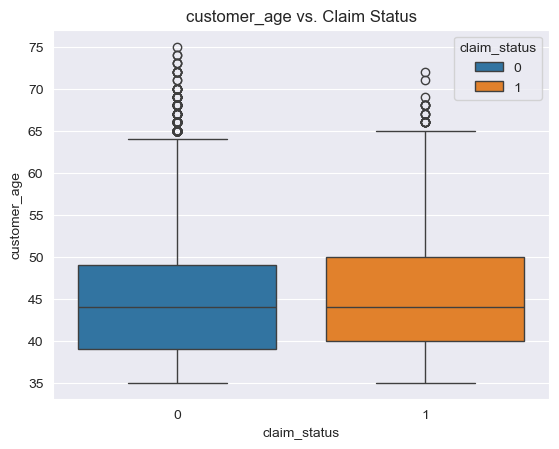

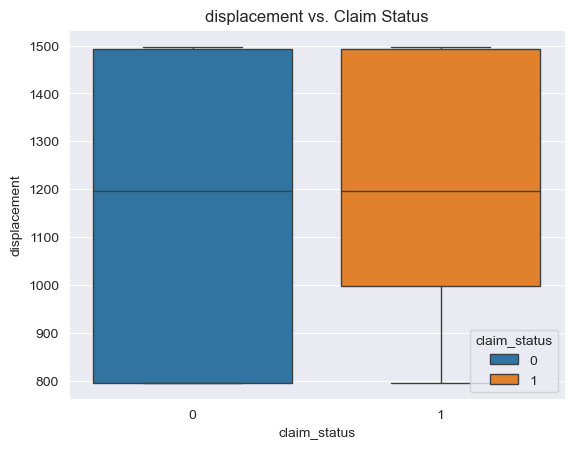

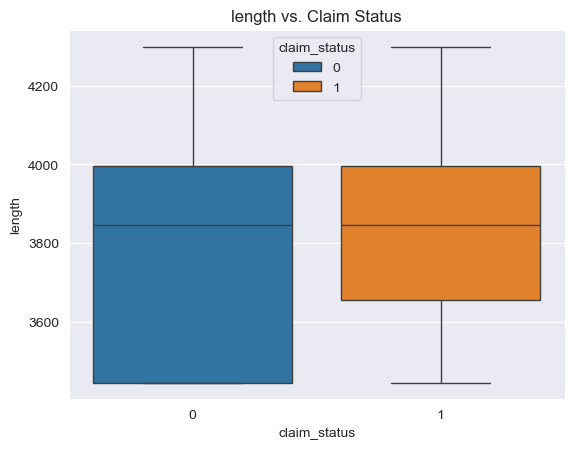

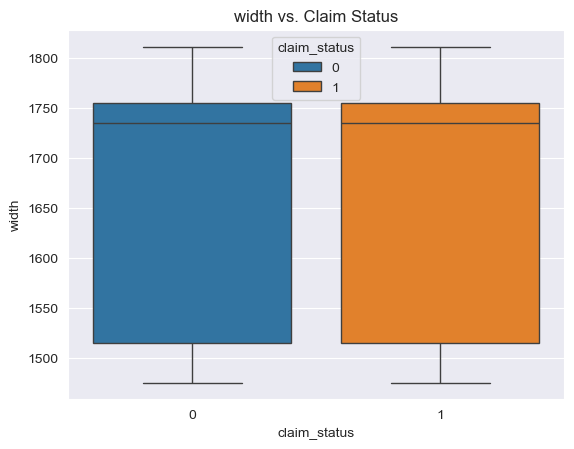

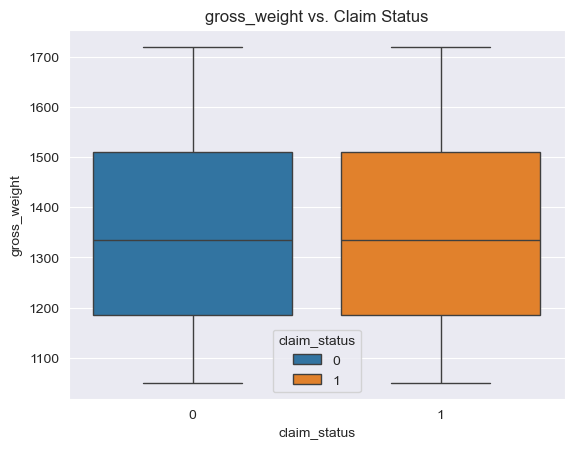

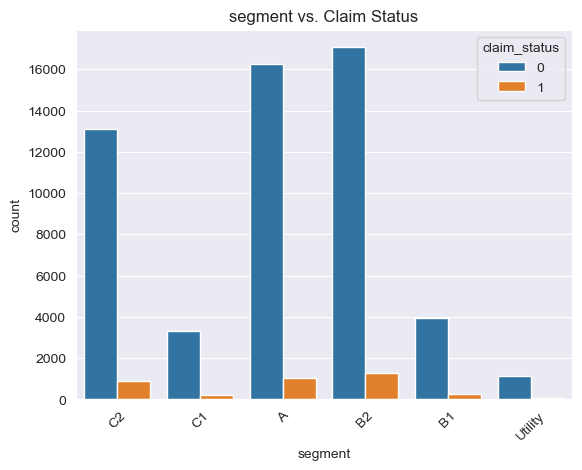

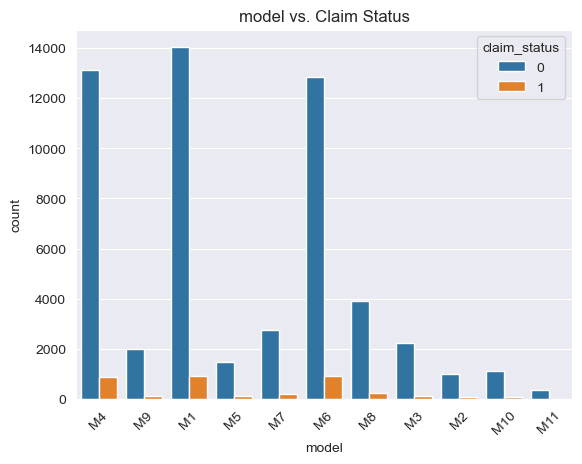

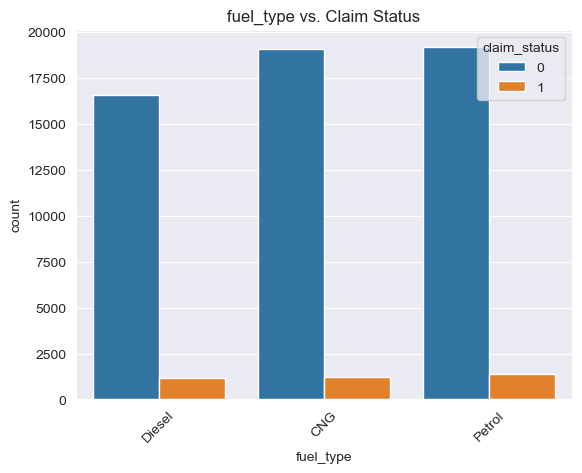

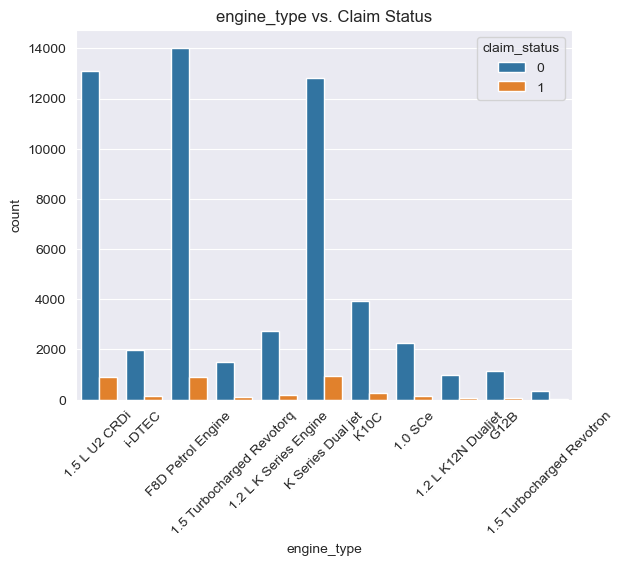

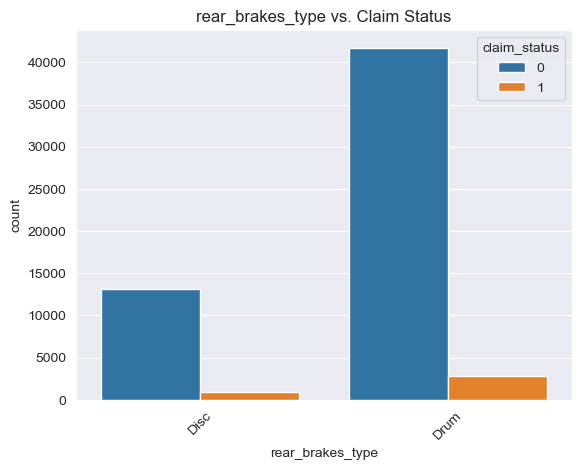

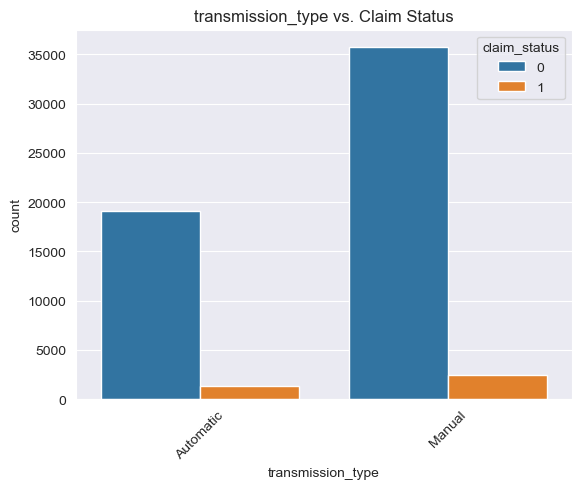

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['subscription_length', 'vehicle_age', 'customer_age', 'displacement', 'length', 'width', 'gross_weight']
for col in numerical_cols:
    sns.boxplot(x='claim_status', y=col, data=data,hue='claim_status')
    plt.title(f'{col} vs. Claim Status')
    plt.show()

categorical_cols = ['segment', 'model', 'fuel_type', 'engine_type', 'rear_brakes_type', 'transmission_type']
for col in categorical_cols:
    sns.countplot(x=col, hue='claim_status', data=data)
    plt.title(f'{col} vs. Claim Status')
    plt.xticks(rotation=45)
    plt.show()


In [173]:
from sklearn.utils import resample
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

minority_oversampled = resample(
    minority,
    replace= True,
    n_samples=len(majority),
    random_state=123
)

resampled_data = pd.concat([majority,minority_oversampled])

resampled_data.claim_status.value_counts()

claim_status
0    54844
1    54844
Name: count, dtype: int64

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [175]:
y = resampled_data['claim_status']
X = resampled_data.drop(['claim_status','policy_id'],axis=1)

In [176]:
X

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
1,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
2,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
3,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19819,10.5,4.6,47,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
43913,4.3,1.8,61,C5,34738,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
10720,6.4,2.8,43,C2,27003,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
53834,10.3,2.0,60,C8,8794,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


In [189]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


numerical_cols = ['subscription_length', 'vehicle_age', 'customer_age', 'displacement', 'length', 'width', 'gross_weight']
categorical_cols = ['segment', 'model', 'fuel_type', 'engine_type', 'rear_brakes_type', 'transmission_type']

oh_encoder = OneHotEncoder()
num_encoder = StandardScaler()
label_encoder = LabelEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', oh_encoder, categorical_cols),
        ('StandardScaler', num_encoder, numerical_cols)
    ])

# Example dataframe
data = pd.DataFrame(X, columns=numerical_cols + categorical_cols)

# Fit and transform
X_preprocessed = preprocessor.fit_transform(X)


In [192]:
X_preprocessed

array([[ 0.        ,  0.        ,  0.        , ...,  1.43844259,
         1.03835411,  1.57747735],
       [ 0.        ,  0.        ,  0.        , ...,  0.45462211,
         0.18585271, -1.58683454],
       [ 0.        ,  0.        ,  0.        , ...,  1.43844259,
         1.03835411,  1.57747735],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.43844259,
         1.03835411,  1.57747735],
       [ 0.        ,  0.        ,  1.        , ..., -0.02922403,
         0.54480067, -0.24353921],
       [ 1.        ,  0.        ,  0.        , ..., -1.31948041,
        -1.42941309, -0.95302618]])

In [193]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.3, random_state=42)

# create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     16574
           1       0.92      1.00      0.96     16333

    accuracy                           0.96     32907
   macro avg       0.96      0.96      0.96     32907
weighted avg       0.96      0.96      0.96     32907

